# Measuring X as a function of time

Sometimes we'd like to measure something as a function of elapsed wall clock time. QCoDeS provides a convenient default way of doing such a measurement, namely by using the `ElapsedTimeParameter`.

The main utility of having a default way of measuring time is the uniformity in data of different experiments.

In [1]:
from pathlib import Path

import numpy as np

from qcodes.dataset import (
    Measurement,
    initialise_or_create_database_at,
    load_or_create_experiment,
    plot_dataset,
)
from qcodes.parameters import ElapsedTimeParameter, Parameter

### Prepatory footwork: setup database and experiment

In [2]:
initialise_or_create_database_at(
    Path.cwd().parent / "example_output" / "x_as_a_function_of_time.db"
)
load_or_create_experiment("tutorial", "no_sample")

tutorial#no_sample#1@/home/runner/work/Qcodes/Qcodes/docs/examples/example_output/x_as_a_function_of_time.db
------------------------------------------------------------------------------------------------------------

## The measurement itself

We'll measure some Brownian motion. We set up a parameter for the noise.

In [3]:
noise = Parameter("noise", label="Position", unit="m", get_cmd=np.random.randn)
time = ElapsedTimeParameter("time")

In [4]:
meas = Measurement()
meas.register_parameter(time)
meas.register_parameter(noise, setpoints=[time])

In [5]:
with meas.run() as datasaver:
    pos = 0
    time.reset_clock()
    for _ in range(100):
        pos += noise()
        now = time()
        datasaver.add_result((noise, pos), (time, now))

dataset = datasaver.dataset

Starting experimental run with id: 1. 


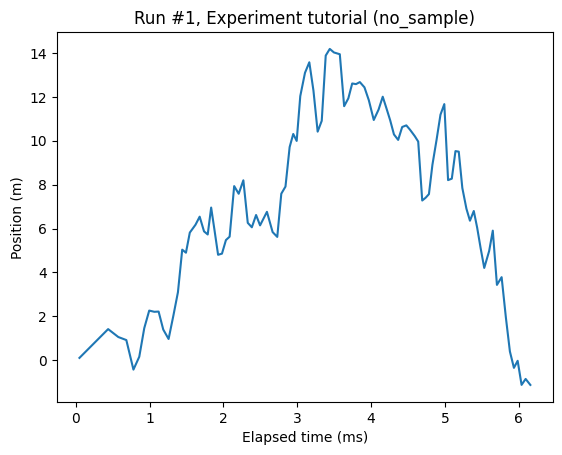

In [6]:
axs, cbs = plot_dataset(dataset)